In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


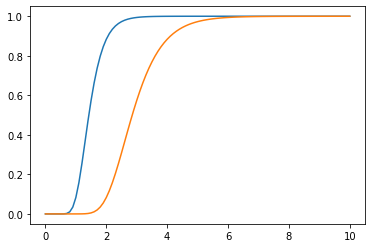

In [3]:
def gf( A, b, k, t):
    W = np.exp( np.log(A)-b*np.exp(-k*t))
    return W

A = 1
b=50
k=3
dt = .1
tmax = 10.
t = np.arange(0., tmax+dt, dt)

W1 = gf(A, b, k, t)
W2 = gf(A, b, k/2, t)
plt.plot(t,W1)
plt.plot(t,W2)

Text(0, 0.5, 'Growth Rate (dW/dt)')

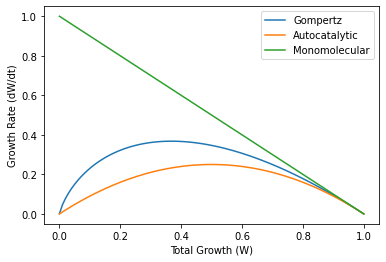

In [4]:
A=1
k=1
W = np.arange(0,1.01,.01)
W[0]=1e-4
gompertz = k*W*(np.log(A/W))
autocat = k*W*(A-W)/A
monomol = k*(A-W)

plt.plot(W,gompertz,label='Gompertz')
plt.plot(W,autocat,label='Autocatalytic')
plt.plot(W,monomol,label='Monomolecular')
plt.legend()
plt.xlabel('Total Growth (W)')
plt.ylabel('Growth Rate (dW/dt)')

In [5]:
W=0
W = np.max((W,1e-4))
print(W)

0.0001


2.766707196677487e-09
[35] [3.5] [0.99163654]


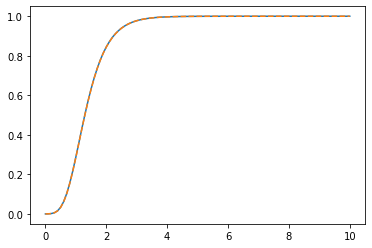

In [6]:
def gompertz(W,t,k=1,A=1):
    dWdt = k*W*(np.log(A/W))
    return dWdt

k=2
A=1
t=np.linspace(0, 10, 101)
W0 = 1e-4
W = np.squeeze( odeint(gompertz, W0, t, args=(k, A)) ) 

plt.plot(t,W,label='Numerical')
b=9.25
Wa = A*np.exp(-b*np.exp(-k*t))
plt.plot(t,Wa,'--',label='Analytical')
print(np.max( (Wa-W.T) ))
i99 = np.argwhere(W>=.99)[0]
print(i99,t[i99],W[i99])

[ 7.77252777 17.92053265 18.00082644 21.85169503 41.91161605 18.19733927
 22.6555608  25.5770896  21.00125482  9.09370069 13.20697742 24.7394906
 25.47417375 16.02961081 13.39292949 11.01360399 22.25149442 22.69099255
 16.63021295 24.00936707]
[1.07725278 2.09205326 2.10008264 2.4851695  4.4911616  2.11973393
 2.56555608 2.85770896 2.40012548 1.20937007 1.62069774 2.77394906
 2.84741738 1.90296108 1.63929295 1.4013604  2.52514944 2.56909926
 1.96302129 2.70093671]


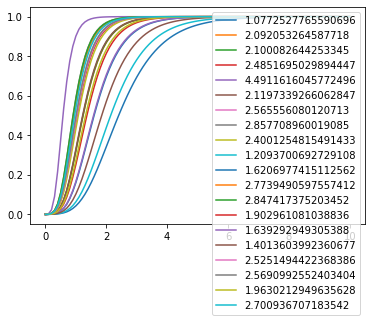

In [7]:
thick = np.random.normal(loc=20.0, scale=10.0, size=20)
print(thick)

kt = .3+thick/10.
print(kt)

for kti in kt:
    ts = '{}'.format(kti)
    plt.plot(t, A*np.exp(-b*np.exp(-kti*t)),label=ts)
             
plt.legend()
    

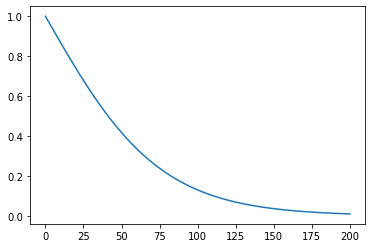

In [68]:
plt.plot( 1- np.tanh(thick/75.))

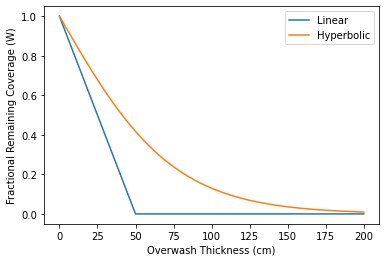

In [69]:
max_thick = 50
def W_thick(thick, Wmin=1.e-4, max_thick=100.):
    Wt = 1.-thick/max_thick
    Wt[Wt<=Wmin]=Wmin
    return Wt

def W_thickh( thick, tscale=75):
    Wt = 1.-np.tanh( thick/tscale )
    return Wt

thick = np.linspace(0,200,201)
Wt= W_thick( thick, max_thick=50.)
Wth= W_thickh( thick )

plt.plot(thick,Wt,label='Linear')
plt.plot(thick,Wth,label='Hyperbolic')
plt.ylabel('Fractional Remaining Coverage (W)')
plt.xlabel('Overwash Thickness (cm)')
plt.legend()

Text(0.5, 0, 'Time (y)')

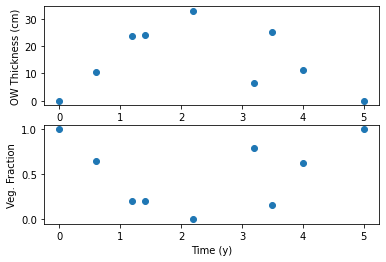

In [95]:
# time series of events. first entry is zero, last entry is end of model run
owt = [0., .6, 1.2, 1.4, 2.2, 3.2, 3.5, 4., 5.]
etype = np.zeros_like(owt).astype('int')
etype[3] = 1
now = len(owt)
# owthick = np.random.normal(loc=20.0, scale=10.0, size=now)
owthick[0] = 0.
owthick[-1] = 0.
owthick[owthick<0]=0.
Wt = W_thick( owthick, max_thick=30 )

fig, axs = plt.subplots(2,1)
axs[0].plot(owt,owthick,'o')
axs[0].set_ylabel('OW Thickness (cm)')
axs[1].plot(owt,Wt,'o')
axs[1].set_ylabel('Veg. Fraction')
axs[1].set_xlabel('Time (y)')

In [116]:
def flatten_list(xss):
    # https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists
    return [x for xs in xss for x in xs]

A = 1.
k = 2.
dt = .02
t = []
W = []

for i in np.arange(len(owt)-1):
    # make ts array for i to i+1
    ti = np.arange(owt[i], owt[i+1], dt )

    if i==0:
        W0 = 1.
        k=2.
    else:
        if etype[i]==1:
            W0 = 1.e-6
            k=.5
        else:
            W0 = Wi[-1]*Wt[i]
            k=2.
    #print(W0)
    
    Wi = np.squeeze( odeint(gompertz, W0, ti, args=(k, A)) ) 
    t.append( ti.tolist() )
    W.append( Wi.tolist() )

t = flatten_list(t)
W = flatten_list(W)    

1.0
0.6457468337082144
0.18114667255075717
1e-06
9.59136030758118e-09
0.05942023818509257
0.03169736718033077
0.16588628555313287


Text(0.5, 0, 'Time (y)')

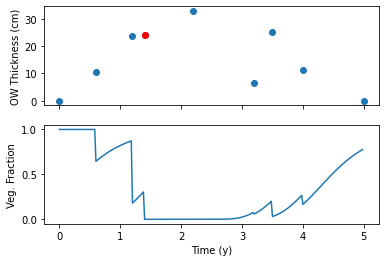

In [117]:
fig, axs = plt.subplots(2,1, sharex = True)
axs[0].plot(owt,owthick,'o')
axs[0].plot(owt[int(np.argwhere(etype==1))], owthick[int(np.argwhere(etype==1))], 'or')
axs[0].set_ylabel('OW Thickness (cm)')
axs[1].plot(t,W)
axs[1].set_ylabel('Veg. Fraction')
axs[1].set_xlabel('Time (y)')